In [5]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

In [6]:
url = "https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"

In [7]:
titanic = pd.read_csv(url)

In [8]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
col = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch','Fare','Survived']

In [12]:
data = titanic[col]

In [13]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,1
3,1,female,35.0,1,0,53.1000,1
4,3,male,35.0,0,0,8.0500,0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Survived  891 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


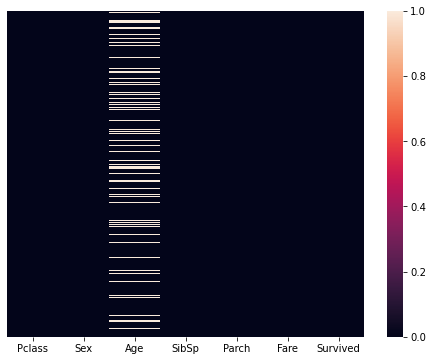

In [14]:
missing = data.isnull()
ax = plt.figure(figsize=(8,6))
sb.heatmap(missing ,yticklabels=False )
plt.show()

In [15]:
sum_missing_age = data['Age'].isnull().sum()
print("Number of missing values: ",sum_missing_age)
Percent = (sum_missing_age/(len(data.Age)))*100
print(f'Percentage of missing values: {Percent}')

Number of missing values:  177
Percentage of missing values: 19.865319865319865


In [16]:
for i in range(1,4):
    dummy = data[data.Pclass==i]
    print(f"Average age: {dummy.Age.mean()} when Pclass: {i}")

Average age: 38.233440860215055 when Pclass: 1
Average age: 29.87763005780347 when Pclass: 2
Average age: 25.14061971830986 when Pclass: 3


In [17]:
#creating a function to replace the missing values based on the pclass
def fill_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age)==1:
        if Pclass==1:
            return 38
        if Pclass ==2:
            return 30
        else:
            return 25
    else:
        return Age

In [18]:
#Let's apply this on Age column
data['Age']=data[['Age','Pclass']].apply(fill_age, axis=1)

/var/folders/94/f9mf3c_13m5dmrbf22ds60800000gp/T/ipykernel_18042/31395152.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age']=data[['Age','Pclass']].apply(fill_age, axis=1)


/Users/sathvikkiran/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/sathvikkiran/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normal Distrubution')

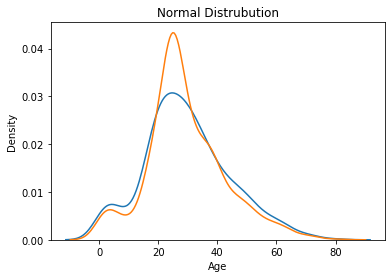

In [19]:
sb.distplot(titanic['Age'],label="Actual",hist=False)
sb.distplot(data['Age'], label='After Filling NA', hist=False)
plt.title("Normal Distrubution")

In [20]:
titanic.Age.mean()

29.69911764705882

In [21]:
data.Age.mean()

29.26506172839506

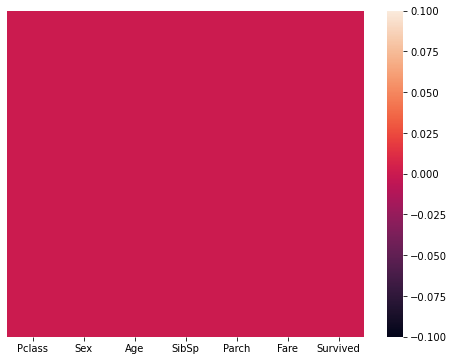

In [22]:
#check any missing value
missing = data.isnull()
ax = plt.figure(figsize=(8,6))
sb.heatmap(missing ,yticklabels=False )
plt.show()

/Users/sathvikkiran/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

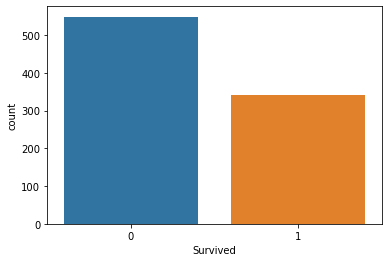

In [23]:
sb.countplot(data['Survived'])

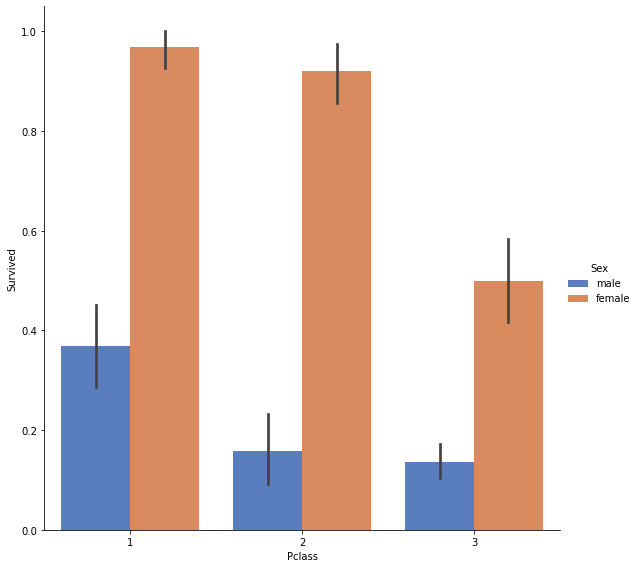

In [24]:
sb.catplot(x='Pclass',y='Survived',data=data,kind='bar',height=8,palette='muted',hue='Sex')

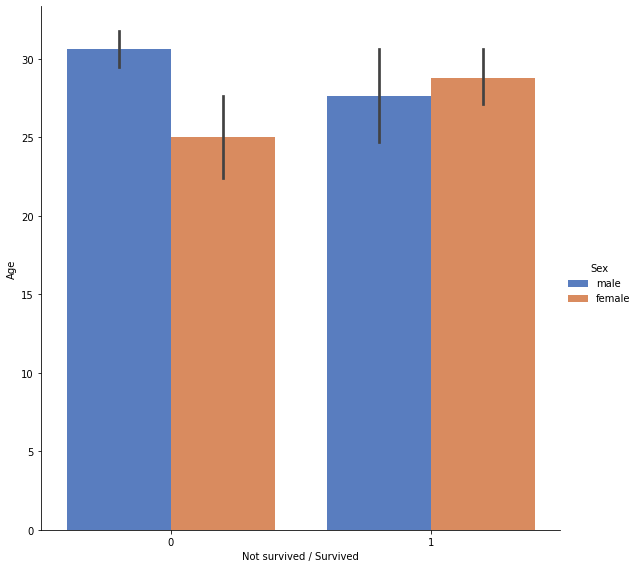

In [25]:
fig = sb.catplot(x='Survived',y='Age',data=data,kind='bar',height=8,palette='muted',hue='Sex')
fig.set_xlabels('Not survived / Survived')

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Survived  891 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [27]:
data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [28]:
le = LabelEncoder()
data['Sex'] = le.fit_transform(data.Sex)

NameError: name 'LabelEncoder' is not defined

In [29]:
#Converting categorical column into numeric
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Sex'] = le.fit_transform(data.Sex)

/var/folders/94/f9mf3c_13m5dmrbf22ds60800000gp/T/ipykernel_18042/3776313054.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sex'] = le.fit_transform(data.Sex)


In [30]:
data.Sex.dtype

dtype('int64')

In [31]:
data.Sex.value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [32]:
#Seperating the data into features and label
feature = data.iloc[:,0:5].values
label = data.iloc[:,6].values

In [33]:
print(f"Dimension of the feature: {feature.ndim} and the label: {label.ndim}")

Dimension of the feature: 2 and the label: 1


In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(feature, label, test_size=0.2,random_state=i)
    
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
    
train_score = model.score(x_train,y_train)
test_score = model.score(x_test,y_test)
print(f"test score {test_score}, train score {train_score}")

test score 0.7821229050279329, train score 0.922752808988764


In [35]:
#Model training and testing
from sklearn.model_selection import train_test_split
for i in range(51,150):
    
    x_train,x_test,y_train,y_test = train_test_split(feature, label, test_size=0.2,random_state=i)
    
    from sklearn.tree import DecisionTreeClassifier
    model = DecisionTreeClassifier()
    model.fit(x_train,y_train)
    
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    
    if test_score>0.85:
        print(f"test score {test_score}, train score {train_score}, Rs {i}")

test score 0.8547486033519553, train score 0.9157303370786517, Rs 130


## Hyper parameter tuning

In [36]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score( estimator=model, X=feature, y=label, cv=10)

In [37]:
print("Min score: ",np.min(cv_score))
print("Avg score: ",np.average(cv_score))
print("Max score: ",np.max(cv_score))

Min score:  0.7303370786516854
Avg score:  0.7946816479400749
Max score:  0.8426966292134831


In [38]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [41]:
#GridSearchCV helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. 
#In the end, the best parameters can be selected from the listed hyperparameters.
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=model,
                     param_grid=grid_param,
                     cv=10,
                    n_jobs =-1)

In [42]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [43]:
best_parameters =  grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 27, 'min_samples_leaf': 3, 'min_samples_split': 8, 'splitter': 'random'}


In [44]:
grid_search.best_score_

0.8215962441314554

In [45]:
#Model training and testing with maxdepth 7
from sklearn.model_selection import train_test_split
for i in range(0,150):
    
    x_train,x_test,y_train,y_test = train_test_split(feature, label, test_size=0.2,random_state=i)
    
    from sklearn.tree import DecisionTreeClassifier
    model = DecisionTreeClassifier(max_depth=7,
                                   min_samples_leaf=4,
                                   min_samples_split=4)
    model.fit(x_train,y_train)
    
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    
    if test_score>0.85:
        print(f"test score {test_score}, train score {train_score}, Rs {i}")
    

test score 0.8547486033519553, train score 0.8623595505617978, Rs 0
test score 0.888268156424581, train score 0.8455056179775281, Rs 18
test score 0.8547486033519553, train score 0.8539325842696629, Rs 29
test score 0.8547486033519553, train score 0.8497191011235955, Rs 34
test score 0.8603351955307262, train score 0.8525280898876404, Rs 42
test score 0.8659217877094972, train score 0.8497191011235955, Rs 45
test score 0.8603351955307262, train score 0.851123595505618, Rs 46
test score 0.8715083798882681, train score 0.8553370786516854, Rs 74
test score 0.8547486033519553, train score 0.848314606741573, Rs 83
test score 0.8603351955307262, train score 0.8497191011235955, Rs 88
test score 0.8547486033519553, train score 0.8426966292134831, Rs 90
test score 0.8659217877094972, train score 0.8525280898876404, Rs 93
test score 0.8659217877094972, train score 0.8553370786516854, Rs 115
test score 0.8603351955307262, train score 0.8623595505617978, Rs 123
test score 0.8603351955307262, train

In [46]:
#Kfold method to get the best training and testing dataset
#Initialize the algo
from sklearn.tree import DecisionTreeClassifier
model_1 = DecisionTreeClassifier(max_depth=6)

from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, random_state=93, shuffle=True)

i=0
for train, test in kfold.split(feature):
    i = i+1
    
    x_trains,x_tests = feature[train],feature[test]
    y_trains,y_tests = label[train],label[test]
    
    model_1.fit(x_trains,y_trains)
    
    if model_1.score(x_tests,y_tests) >= 0.85:
        print("Test Score: {}, train score: {}, for Sample Split: {}".format(model.score(x_tests,y_tests),model.score(x_trains,y_trains),i))
    

Test Score: 0.9, train score: 0.8564294631710362, for Sample Split: 1
Test Score: 0.898876404494382, train score: 0.8566084788029925, for Sample Split: 2
Test Score: 0.8651685393258427, train score: 0.8603491271820449, for Sample Split: 3


In [47]:
#Initialize the algo
from sklearn.tree import DecisionTreeClassifier
model_1 = DecisionTreeClassifier(max_depth=6)

from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, random_state=93, shuffle=True)

i=0
for train, test in kfold.split(feature):
    i = i+1
    if i==2:
        
        x_trains,x_tests = feature[train],feature[test]
        y_trains,y_tests = label[train],label[test]
    
        model_1.fit(x_trains,y_trains)
    
        if model_1.score(x_tests,y_tests) >= 0.85:
            print("Test Score: {}, train score: {}, for Sample Split: {}".format(model.score(x_tests,y_tests),model.score(x_trains,y_trains),i))
    

Test Score: 0.898876404494382, train score: 0.8566084788029925, for Sample Split: 2


# Prediction and Classification report

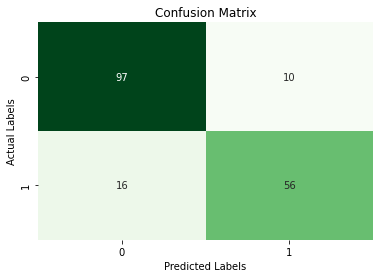

In [48]:
predict = model_1.predict(x_test)

from sklearn. metrics import confusion_matrix
cm = confusion_matrix(y_test, predict)
ax = plt.subplot()
sb.heatmap(cm, cbar=False,ax=ax,fmt='g', annot=True,cmap='Greens' )
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()

In [49]:
from sklearn.metrics import classification_report
report =  classification_report(y_test, predict)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       107
           1       0.85      0.78      0.81        72

    accuracy                           0.85       179
   macro avg       0.85      0.84      0.85       179
weighted avg       0.85      0.85      0.85       179

